In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# importing necessary libraries -pandas , numpy, seaborn ,matplotlib for data reading , numerical aplication , plotting and visualisation

In [17]:
titanic_data=pd.read_csv('Downloads/titanic.csv')
# reading csv file

In [105]:
print(titanic_data)
# printing csv file

     Survived   Age  Siblings/Spouses Aboard  Parents/Children Aboard  \
0           0  22.0                        1                        0   
1           1  38.0                        1                        0   
2           1  26.0                        0                        0   
3           1  35.0                        1                        0   
4           0  35.0                        0                        0   
..        ...   ...                      ...                      ...   
882         0  27.0                        0                        0   
883         1  19.0                        0                        0   
884         0   7.0                        1                        2   
885         1  26.0                        0                        0   
886         0  32.0                        0                        0   

        Fare  male  2  3  
0     7.2500     1  0  1  
1    71.2833     0  0  0  
2     7.9250     0  0  1  
3    53.1000   

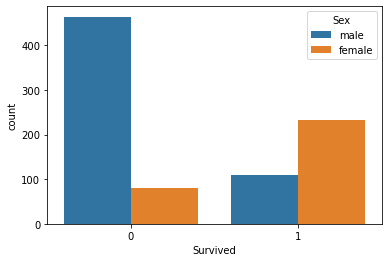

In [19]:
sns.countplot(x='Survived',hue='Sex',data=titanic_data)
# plotting count plot of survived vs sex

In [20]:
titanic_data.info()
# gathering basic info on data given

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


In [21]:
titanic_data.isnull().sum()
# checking the total null value

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

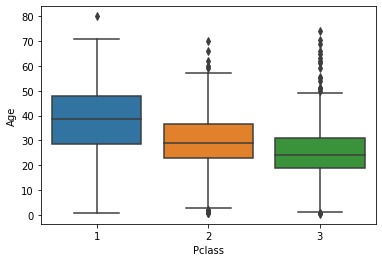

In [22]:
sns.boxplot(x='Pclass',y='Age',data=titanic_data)
# plotting box plot Pclass vs Age

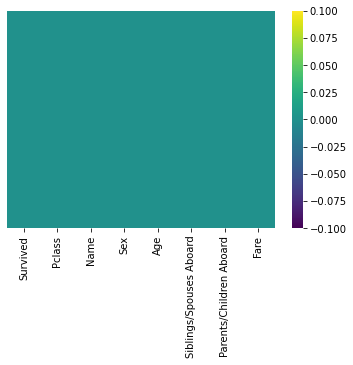

In [23]:
sns.heatmap(titanic_data.isnull(),yticklabels=False,cmap='viridis')
# plotting titanic_data null vale. so that we will get clear picture on presence of null value

In [44]:
sex = pd.get_dummies(titanic_data['Sex'], drop_first = True)
# converting sex into binary, through male col we can understand 0 is female and 1 is male. so it will be useful for categorical 

In [45]:
pclass = pd.get_dummies(titanic_data['Pclass'], drop_first = True)
# applying dummies for PClass also

In [46]:
titanic_data = pd.concat([titanic_data, sex, pclass], axis = 1)
# adding titanic_data with Sex and Pclass

In [55]:
titanic_data.drop(['Pclass', 'Name', 'Sex'], axis = 1, inplace = True)
# dropping unwanted repetations from titanic_data

In [56]:
titanic_data.head()
# viewing data set after the EDA

,Survived,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,male,2,3
0,0,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,1,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,0
4,0,35.0,0,0,8.0500,1,0,1


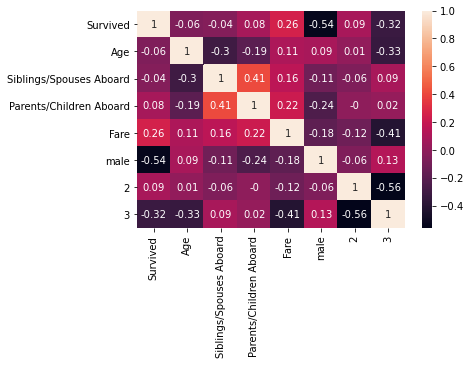

In [57]:
corr = titanic_data.corr().round(2)
sns.heatmap(corr, annot = True)
# plotting heatmap of present titanic_data

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# importing libraraies necessary ML operations - Logistic Regression libarary and train_test split libarary is imported 

In [75]:
X = titanic_data[['male']]
y = titanic_data['Survived']
# giving values to X and Y  

In [95]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.3,random_state=1)
# train_test_split operation is done with test_soze of 30% from the given data set

In [96]:
model_lg=LogisticRegression()
# Logistic Regression function is called

logmodel.fit(X_train,Y_train)

In [97]:
model_lg.fit(X_train, y_train)
# fit function is called where actual training happens

LogisticRegression()

In [98]:
prediction=model_lg.predict(X_test)
# using Test set predicted value is stired in predictoon variable

In [99]:
from sklearn.metrics import classification_report
# importing classification_report libarary for getting results on all classifaction parameters

In [100]:
classification_report(Y_test,prediction)
# classification is happening

'              precision    recall  f1-score   support\n\n           0       0.81      0.82      0.82       162\n           1       0.72      0.70      0.71       105\n\n    accuracy                           0.78       267\n   macro avg       0.76      0.76      0.76       267\nweighted avg       0.77      0.78      0.77       267\n'

In [101]:
from sklearn.metrics import confusion_matrix
# importing library for confusion_matrix 

In [102]:
confusion_matrix(Y_test,prediction)
# confusion_matrix operation is happening

array([[133,  29],
       [ 31,  74]], dtype=int64)

In [103]:
from sklearn.metrics import accuracy_score
# importing library for accuracy calculation

In [104]:
accuracy_score(Y_test,prediction)
# got accuracy score of 77.5%

0.7752808988764045

In [ ]:
#Inference- As per my model having test size of 30 % and training size of 70% my model has got accuracy of 77.5 which inturn is rounded
 # to 78 % which means my model predicts survival rate of 78% in ship and 22% death.